# O Desafio
Criar um modedlos de credit score, utilizando dados do seguinte link:
https://www.kaggle.com/datasets/parisrohan/credit-score-classification

1-	Criar um modelo de classificação e aplicar na base e colher e explicar os resultados.
2-	Usar um algoritmo não supervisionado para classificar a base e comparar resultados



# Configurações Iniciais

É necessário possuir instaladas as dependências abaixo listadas:

    matplotlib
    sweetviz
    pandas
    numpy
    seaborn


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import math


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,  accuracy_score, recall_score,precision_recall_fscore_support

É necessário montar o drive do google para acessar os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.0
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.13.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.0
bqplot==0.12.42
branca==0.7.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.2
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.0
cryptography==41.0.5
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cy

# O Data Set

O dataset do kaggle se encontra no link. Nossa variável Target é 'Credit_Score' e temos 26 features. São 50 mil entradas no dataset train e  mil no test.

Features:

ID                     
Customer_ID

Month

Name

Age

SSN

Occupation

Annual_Income

Monthly_Inhand_Salary

Num_Bank_Accounts

Num_Credit_Card

Interest_Rate

Num_of_Loan

Type_of_Loan

Delay_from_due_date

Num_of_Delayed_Payment

Changed_Credit_Limit

Num_Credit_Inquiries  

Credit_Mix

Outstanding_Debt

Credit_Utilization_Ratio

Credit_History_Age

Payment_of_Min_Amount

Total_EMI_per_month

Amount_invested_monthly

Payment_Behaviour

Monthly_Balance

Credit_Score

In [ ]:
train_path='/content/drive/MyDrive/FIAP/Machine Learning/Machine Learning - Trabalho Integrado /Dados/train.csv'
test_path='/content/drive/MyDrive/FIAP/Machine Learning/Machine Learning - Trabalho Integrado /Dados/test.csv'

train_original=pd.read_csv(train_path)
train=train_original.copy()
test_original=pd.read_csv(test_path)

<ipython-input-90-21c5fccd51e5>:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_original=pd.read_csv(train_path)


In [ ]:
display(
train.info(),
print(),
test_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

None

None

None

# Preparando o Data Set

## Variável Categóricas

In [ ]:
cat_feat = train.describe(include='O').columns
cat_feat

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
for feature in cat_feat:
    print('Column Name: '+feature)
    print("**"*20)
    print(train[feature].value_counts(dropna=False))
    print('END', "--"*18, '\n')



Column Name: ID
****************************************
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
NaN               9985
Stevex              44
Langep  

Corrigindo valores que contenham "-" ou que são estranhos

In [ ]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')


train = train.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


## Corrigindo Data Types

In [ ]:
train['Month']                   = pd.to_datetime(train.Month, format='%B').dt.month
train['Age']                     = train.Age.astype(int)
train['Annual_Income']           = train.Annual_Income.astype(float)
train['Num_of_Loan']             = train.Num_of_Loan.astype(int)
train['Num_of_Delayed_Payment']  = train.Num_of_Delayed_Payment.astype(float)
train['Changed_Credit_Limit']    = train.Changed_Credit_Limit.astype(float)
train['Outstanding_Debt']        = train.Outstanding_Debt.astype(float)
train['Amount_invested_monthly'] = train.Amount_invested_monthly.astype(float)
train['Monthly_Balance']         = train.Monthly_Balance.astype(float)

## Corrigindo categorias de Credit_History_Age



In [ ]:
# Credit_History_Age

# ****************************************
# NaN                       9030
# 15 Years and 11 Months     446
# 19 Years and 4 Months      445
import re

def age_converter(age_string):
  if pd.notnull(age_string):
      # Use regular expression to extract years and months
      match = re.match(r'(\d+) Years and (\d+) Months', age_string)

      if match:
        years = int(match.group(1))
        months = int(match.group(2))
        total_months = years * 12 + months
        return total_months
      else:
        return None  # Handle the case where the format is not as expected
  else:
    return age_string


train['Credit_History_Age'] = train.Credit_History_Age.apply(lambda x: age_converter(x)).astype(float)
train['Credit_History_Age'].unique()

array([265.,  nan, 267., 268., 269., 270., 271., 319., 320., 321., 322.,
       323., 324., 325., 326., 213., 214., 215., 217., 218., 219., 220.,
       207., 208., 209., 210., 211., 212., 368., 369., 370., 371., 372.,
       373., 374., 375., 384., 386., 387., 389., 390., 367., 176., 177.,
       178., 179., 180., 181., 182., 256., 257., 258., 259., 260., 261.,
       262., 263., 318., 230., 231., 232., 233., 234., 235., 236., 305.,
       306., 307., 308., 309., 310., 311., 312., 327., 328., 329., 107.,
       108., 109., 110., 111., 112., 114., 221., 222., 224., 225., 202.,
       203., 204., 205., 206., 350., 351., 352., 354., 356., 357.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84., 330., 331., 332., 333.,
       223., 237., 238., 121., 122., 123., 124., 125., 126., 127., 128.,
       393., 394., 395., 396., 397., 400., 147., 148., 149., 150., 151.,
       152., 154., 153., 164., 167., 168., 169., 170., 171., 363., 364.,
       365., 366., 105., 106., 226., 227., 228., 22

## Corrigindo categorias Type_of_Loan

transformando string do tipo Payday Loan, Mortgage Loan, Debt Consolidation Loan, and Student Loan  em lista do tipo ['Payday Loan', 'Mortgage Loan', 'Debt', 'Consolidation Loan','Student Loan']



In [ ]:
train['Type_of_Loan'] = train['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)
train['Type_of_Loan'].unique()

array(['auto loan,credit-builder loan,personal loan,home equity loan',
       'credit-builder loan', 'auto loan,auto loan,not specified', ...,
       'home equity loan,auto loan,auto loan,auto loan',
       'payday loan,student loan,mortgage loan,not specified',
       'personal loan,auto loan,mortgage loan,student loan,student loan'],
      dtype=object)

## Enconding Credit_Score

In [ ]:
train['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
# mapping = {'Good' : 0, 'Standard' : 1, 'Poor' : 2}
# train['Credit_Score'] = data['Credit_Score'].map(mapping)



In [ ]:
train_prepared=train.copy()


# Avaliação Inicial

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=5)

train_NaN=train.dropna()

X=train_NaN.drop(cat_feat,axis=1)

y = train_NaN[['Credit_Score']].copy()

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)


DT.fit(X_train,y_train)

y_pred=DT.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.68      0.18      0.28      1592
        Poor       0.61      0.77      0.68      3098
    Standard       0.67      0.71      0.69      5422

    accuracy                           0.64     10112
   macro avg       0.65      0.55      0.55     10112
weighted avg       0.65      0.64      0.62     10112



In [ ]:
def get_score(y_pred,y_test,name): # Function that return a df containing a name and the recall for each category



# mapping = { 0:'Good' , 1:'Standard' , 2:'Poor'}
# class_labels=[0,1,2]
# class_labels=np.array([mapping.get(val) for val in class_labels])
# class_labels

  mapping = { 0:'Good' , 1:'Standard' , 2:'Poor'}

  # Salvando a precisao, recall e fscore
  precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
  # Salvando Acuracia
  accuracy=accuracy_score(y_test,y_pred)
  # Salvando nome dos labels
  class_labels=np.unique(y_pred)
  # columns=["Recall: "+name for name in class_labels]
  if (y_pred.dtype=='int64'):
    class_labels=np.array([mapping.get(val) for val in class_labels])



  class_labels=["Recall: "+str(medida_name) for medida_name in class_labels]
  #Criando dicionario com resultados
  result={target_name:recall_value for target_name,recall_value in zip(class_labels,recall)}
  result['Acurácia']=accuracy
  # Retornando data frame com resultados
  return pd.DataFrame(result, index=[name]).round(2)



In [ ]:
class_labels=train['Credit_Score'].unique()
columns=["Recall: "+name for name in class_labels]
columns.append('Acurácia')
recall=pd.DataFrame(columns=columns)
recall=recall.append(get_score(y_pred,y_test,'0 - Avaliação Inicial'))
recall


<ipython-input-105-d9f825a3ceac>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recall=recall.append(get_score(y_pred,y_test,'0 - Avaliação Inicial'))


,Recall: Good,Recall: Standard,Recall: Poor,Acurácia
0 - Avaliação Inicial,0.18,0.71,0.77,0.64


## Dropando Colunas descenssárias

In [ ]:
train.drop(columns=['Name'],inplace=True)

In [ ]:
# Salvando resultados intermediários
train_clean=train.copy()

## Analise Exploratoria

### Qualitativa

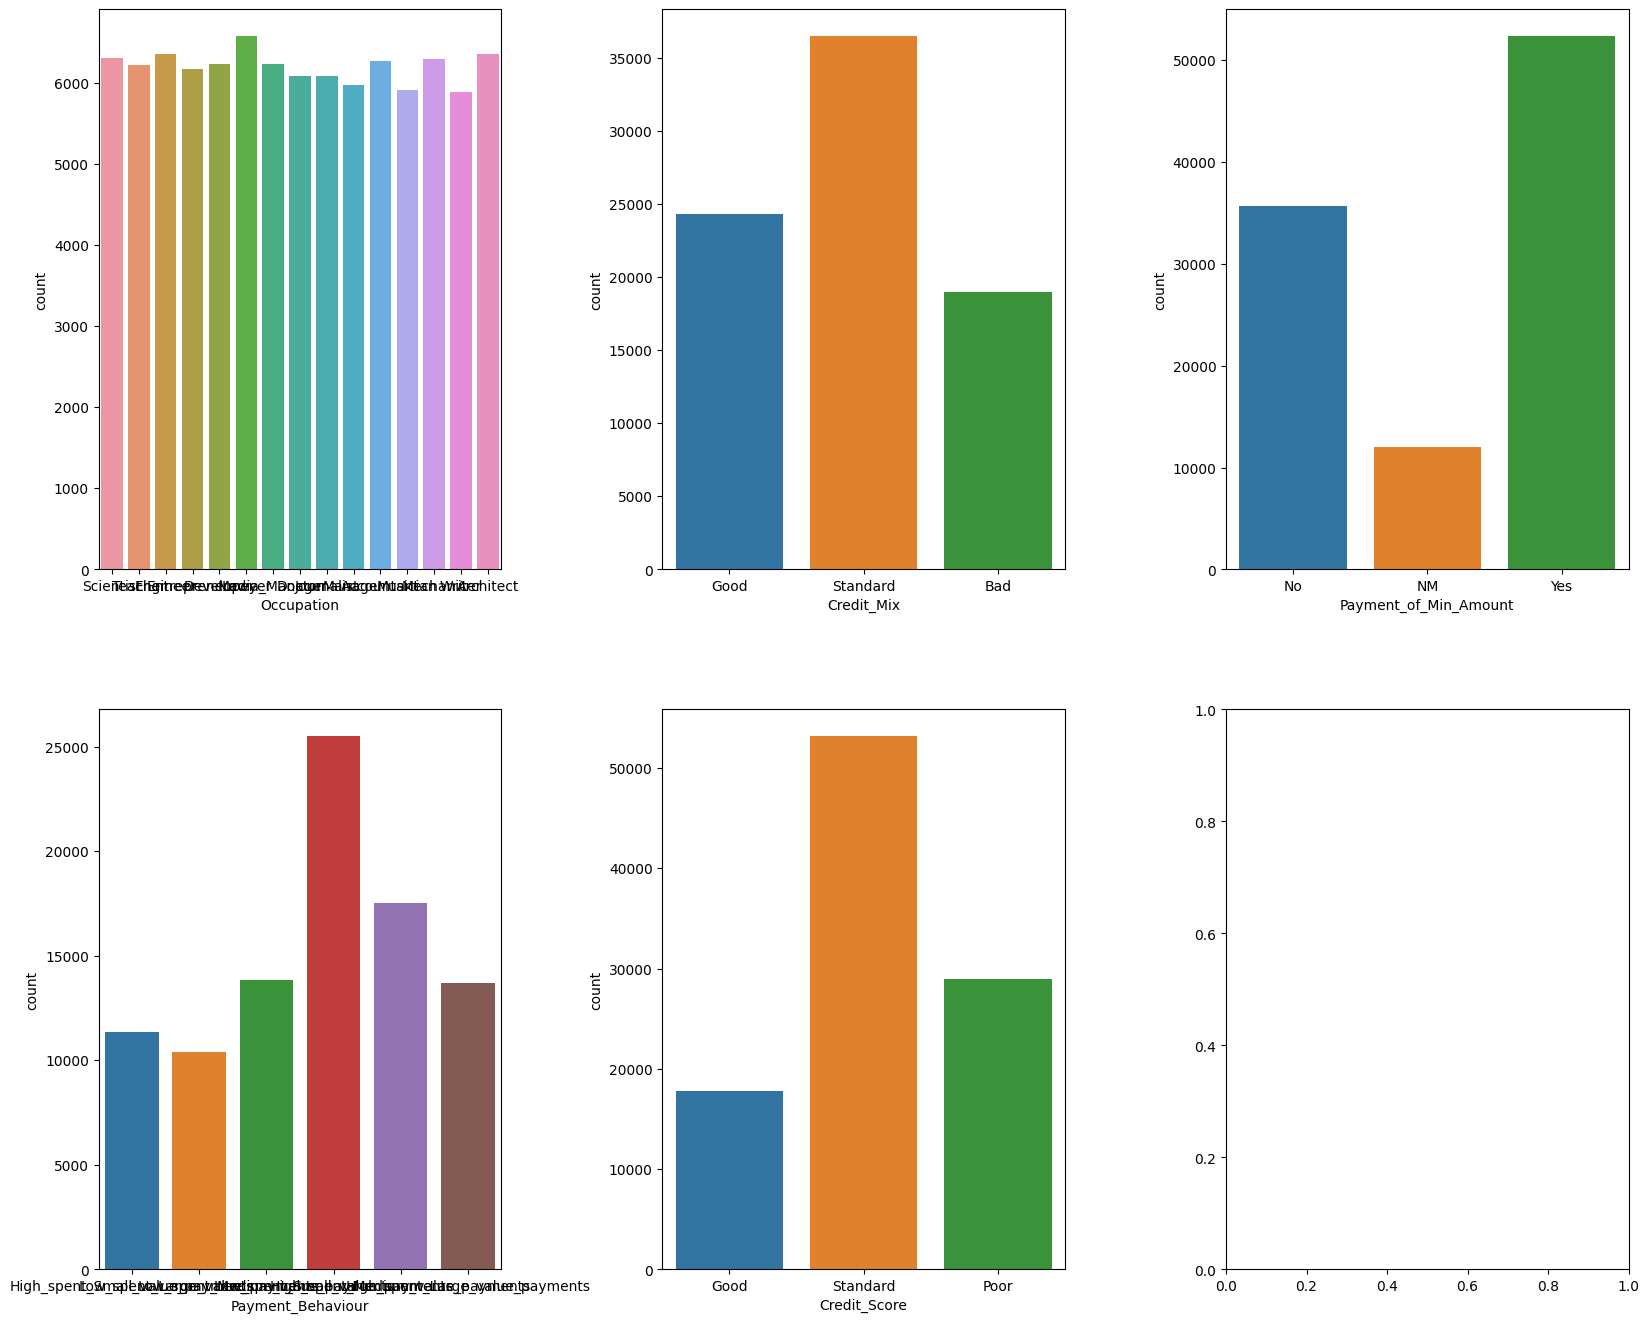

In [ ]:
# Análise das variáveis qualitativas


#Criando lista de features a plotar
features=['Occupation','Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']
#Configurando fig
fig,axs=plt.subplots(nrows=math.ceil(len(features)/3), ncols=3, figsize=(18,len(features)*3))

for col, ax in zip(features[0:], axs.ravel()):
    x=train.loc[:, col]
    ax.set_xlabel(col)
    sns.countplot(x=x, ax=ax, orient='v')
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.25,wspace=0.4)

plt.show()

# folder_path='/content/drive/MyDrive/FIAP/Machine Learning/Machine Learning - Trabalho Integrado '
# plt.savefig(folder_path+"/img/numerical.png")

### Numérica

In [ ]:
numerical_features=train.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_features

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

<ipython-input-110-81f51cc14575>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax, color="blue", kde=False)


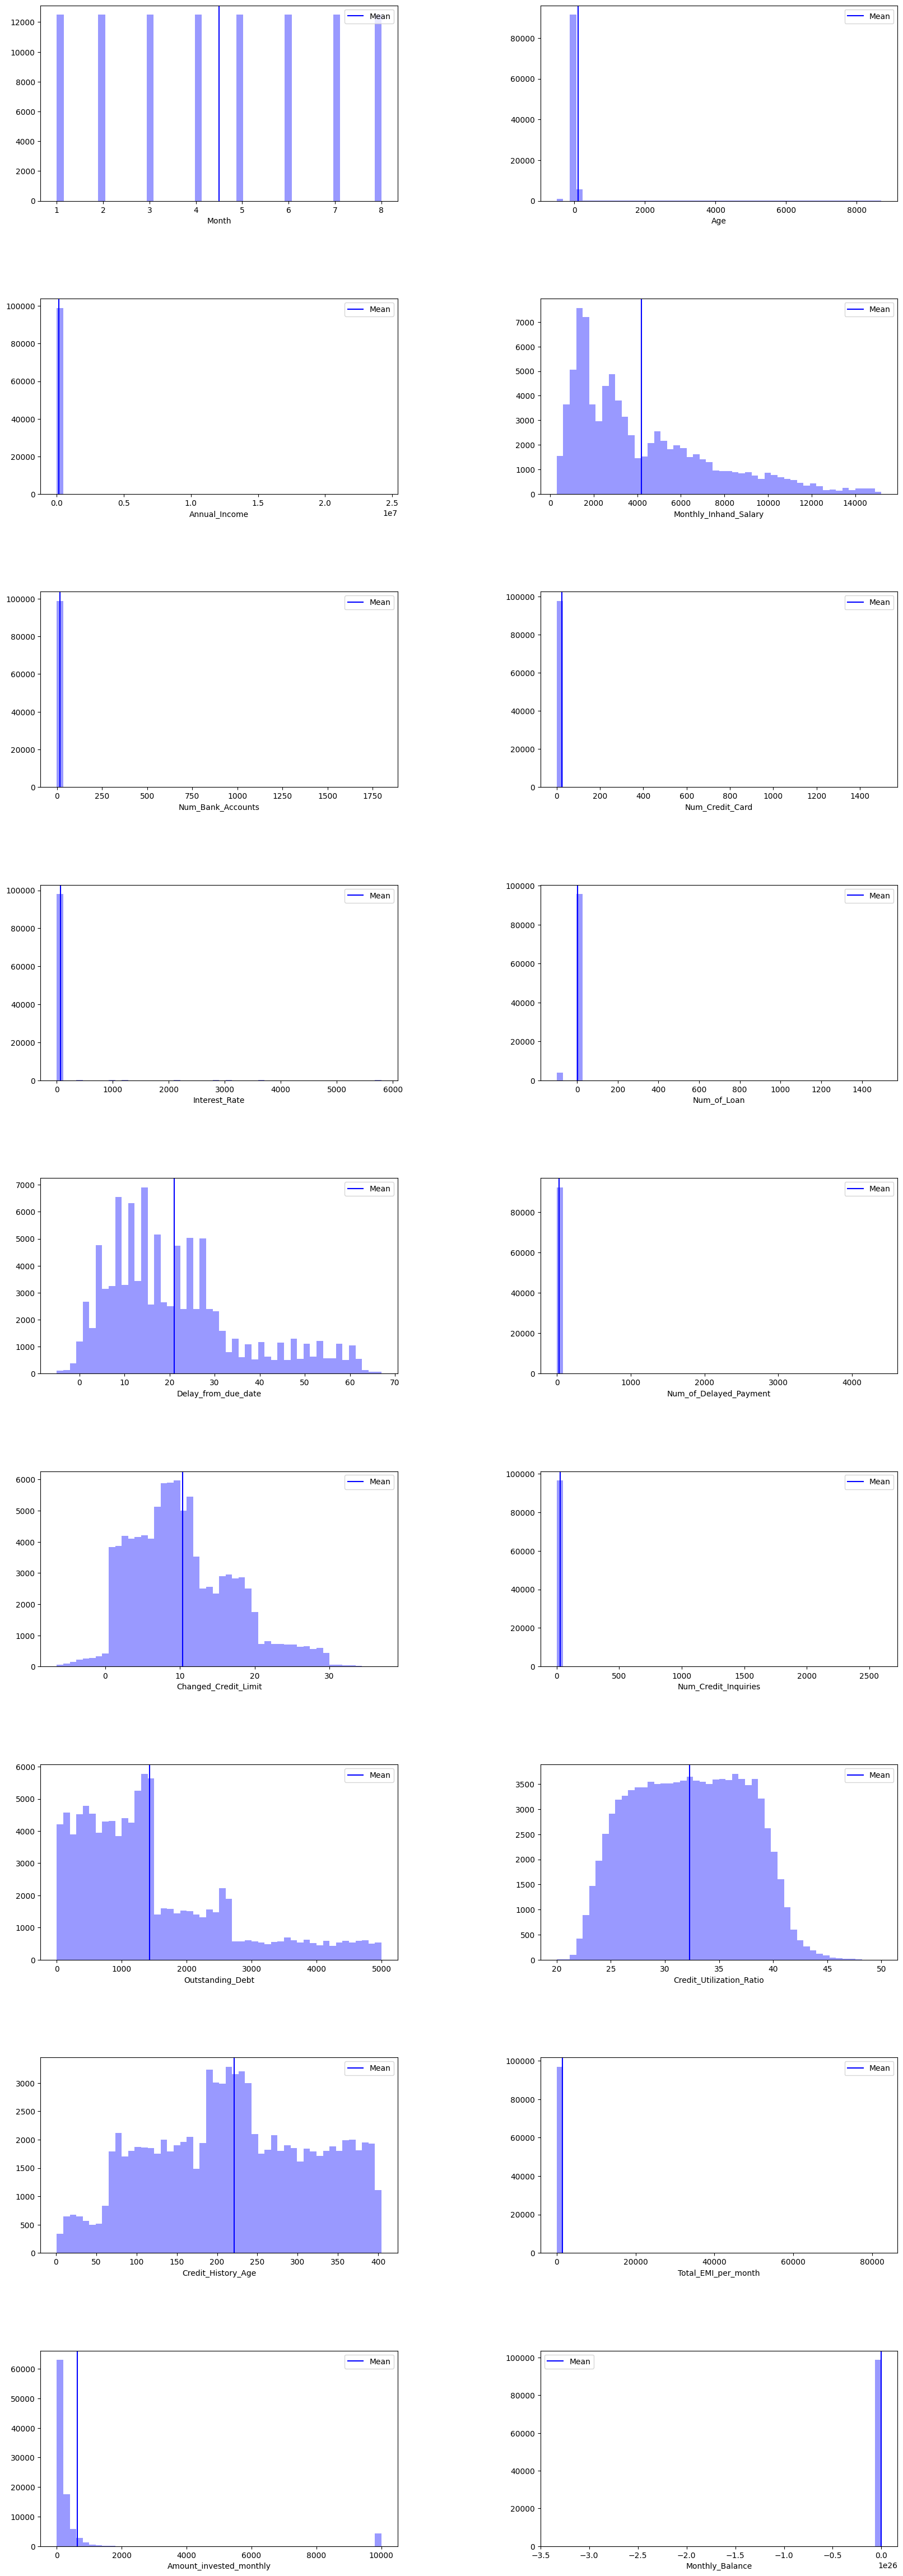

In [ ]:
# Análise exploratória dos dados usando o gráfico histograma
# configurando figure



n_cols=2
n_rows=nrows=math.ceil(len(numerical_features)/n_cols)
fig,axs=plt.subplots(nrows=n_rows,
                     ncols=n_cols,
                     figsize=(18,n_rows*6))

for col, ax in zip(numerical_features[0:], axs.ravel()):
    x=train.loc[:, col]
    ax.set_xlabel(col)
    # ax.axvline(x=outlier_limits.loc[col]['upper_limit'], color='r', label='Upper limit')
    # ax.axvline(x=outlier_limits.loc[col]['lower_limit'], color='g', label='lower limit')
    ax.axvline(x=x.mean(), color='b', label='Mean')
    sns.distplot(x, ax=ax, color="blue", kde=False)
    ax.legend()
    plt.subplots_adjust(top=0.92,bottom=0.08, left=0.10,right=0.95,hspace=0.5,wspace=0.4)

plt.show()
# plt.savefig(f"imgs/categorical.png")

# Feature Engineering

## Inputação de Dados e Exclusão de Outliers

### Variáveis Categóricas

In [ ]:
# Funções de inputacao por group
def Object_NaN_Inputation_By_Group(df, groupby, column, inplace=True):
    import scipy.stats as stats
    # Função que Inputa None como np.NaN
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Inputa None como np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN

        # Inputa com a moda do grupo
        # result = df.groupby(groupby)[column].transform(lambda x: x.fillna(pd.Series(np.unique(x)).mode()[0]))


        # Calculate the mode of 'Occupation' for each 'Customer_ID'
        mode_groupby = df.groupby(groupby)[column].agg(lambda x: x.mode().iat[0])

        # Create a mapping dictionary for Customer_ID to mode
        mode_mapping = mode_groupby.to_dict()

        # Fill NaN values in 'Occupation' based on the mode of each 'Customer_ID'
        result = df.apply(lambda row: mode_mapping[row[groupby]] if pd.isna(row[column]) else row[column], axis=1)



        # inplace
        if inplace:
            df[column]=result
        else:
            return result

    # run
    if inplace:
        # Mostrar Antes de inputar
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        # Inputando
        make_NaN_and_fill_mode(df, groupby, column, inplace)

        # Mostrar depois de imputar
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
      #  Retornar df alterado
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [ ]:
train_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Age                       100000 non-null  int64  
 4   SSN                       94428 non-null   object 
 5   Occupation                92938 non-null   object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  int64  
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  in

#### Inputando Occupation

In [ ]:
train['Occupation'].value_counts(dropna=False)

NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

#### SSN

In [ ]:

Object_NaN_Inputation_By_Group(train, 'Customer_ID', 'SSN')


Before Assigning: SSN: have 5572 NaN Values

Before Assigning Example SSN:

['913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218']
[nan, '063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938']
['238-62-0395', '238-62-0395', '238-62-0395', '238-62-0395', '238-62-0395', '238-62-0395', '238-62-0395', nan]
['793-05-8223', '793-05-8223', '793-05-8223', nan, '793-05-8223', '793-05-8223', '793-05-8223', '793-05-8223']
['930-49-9615', '930-49-9615', '930-49-9615', '930-49-9615', '930-49-9615', '930-49-9615', '930-49-9615', '930-49-9615']

After Assigning Example SSN:

['913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218', '913-74-1218']
['063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938', '063-67-6938']
['238-62-0395', '238-62-0395', '238-62-0395', '238-62-0395', '238-62-0395',

In [ ]:
Object_NaN_Inputation_By_Group(train, 'Customer_ID', 'Occupation')


Before Assigning: Occupation: have 7062 NaN Values

Before Assigning Example Occupation:

['Lawyer', 'Lawyer', 'Lawyer', 'Lawyer', 'Lawyer', 'Lawyer', 'Lawyer', 'Lawyer']
['Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', nan, 'Mechanic', 'Mechanic']
['Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager']
['Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor']
['Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic']

After Assigning Example Occupation:

['Lawyer', 'Lawyer', 'Lawyer', 'Lawyer', 'Lawyer', 'Lawyer', 'Lawyer', 'Lawyer']
['Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic', 'Mechanic']
['Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager']
['Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor', 'Doctor',

#### Type_of_Loan

In [ ]:
train['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)

#### Credit_MIX

In [ ]:
train['Credit_Mix'].value_counts(dropna=False)

Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
Object_NaN_Inputation_By_Group(train, 'Customer_ID', 'Credit_Mix')


Before Assigning: Credit_Mix: have 20195 NaN Values

Before Assigning Example Credit_Mix:

['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad']
['Standard', 'Standard', 'Standard', nan, nan, 'Standard', 'Standard', nan]
['Good', nan, 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', nan, 'Good', 'Good', 'Good']

After Assigning Example Credit_Mix:

['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good']


#### Payment_Behaviour

In [ ]:
train['Payment_Behaviour'].value_counts(dropna=False)

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
NaN                                  7600
Name: Payment_Behaviour, dtype: int64

In [ ]:
Object_NaN_Inputation_By_Group(train, 'Customer_ID', 'Payment_Behaviour')


Before Assigning: Payment_Behaviour: have 7600 NaN Values

Before Assigning Example Payment_Behaviour:

['Low_spent_Large_value_payments', 'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', nan, 'Low_spent_Large_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments']
['Low_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', nan, 'High_spent_Medium_value_payments', 'High_spent_Medium_value_payments']
['Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'High_spent_Large_value_payments', 'High_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'High_spent_Small_value_payments']
['High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'L

### Variáveis Numéricas
Inputaremos outliers e NaN

In [ ]:
train_cat_input=train.copy()
train.select_dtypes(include=['int', 'float']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   float64
 10  Changed_Credit_Limit      97909 non-null   float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [ ]:
# Calula limites de outliers
def get_iqr_lower_upper(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1

    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper



In [ ]:
def Input_Numeric_Wrong_Values(df, groupby, column, inplace=True):
    import scipy.stats as stats

    # Identify Wrong values Range
    def get_group_min_max(df, groupby, column):
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0], y[0]


    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0], y[0]
        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result


    # Run
    if inplace:
        # Before Assigning NaN values
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
        df[column].apply([min, max])
        mini, maxi = get_group_min_max(df, groupby, column)
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini}\nmax:\t{ maxi}', sep='\n', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)

        # After Assigning NaN values
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

#### Num_Credit_Card

Possue Outliers

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Num_Credit_Card')


Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0
max:	11

Before Assigning Example Num_Credit_Card:

[5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5]
[4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3]

After Assigning Example Num_Credit_Card:

[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


#### Age


In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Age')


Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	14
max:	56

Before Assigning Example Age:

[17, 17, 17, 17, 17, 18, 18, 18]
[25, 25, 26, 26, 26, 26, 26, 26]
[18, 18, 18, 18, 19, 19, 19, 19]
[43, 44, 44, 44, 44, 44, 44, 44]
[43, 43, 44, 44, 44, 44, 44, 44]

After Assigning Example Age:

[17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0]
[25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0]
[18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0]
[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
[43.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]


#### Monthly_Inhand_Salary

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Monthly_Inhand_Salary')



Before Assigning: Monthly_Inhand_Salary: have 15002 NaN Values

Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	303.6454166666666
max:	15204.633333333331

Before Assigning Example Monthly_Inhand_Salary:

[2706.1616666666664, nan, 2706.1616666666664, 2706.1616666666664, 2706.1616666666664, 2706.1616666666664, 2706.1616666666664, 2706.1616666666664]
[4250.39, 4250.39, 4250.39, 4250.39, 4250.39, 4250.39, 4250.39, 4250.39]
[9549.7825, 9549.7825, nan, 9549.7825, 9549.7825, 9549.7825, 9549.7825, 9549.7825]
[5208.8725, 5208.8725, 5208.8725, 5208.8725, 5208.8725, 5208.8725, nan, 5208.8725]
[nan, nan, 7962.415000000001, 7962.415000000001, 7962.415000000001, 7962.415000000001, 7962.415000000001, nan]

After Assigning Example Monthly_Inhand_Salary:

[2706.1616666666664, 2706.1616666666664, 2706.1616666666664, 2706.1616666666664, 2706.1616666666664, 2706.1616666666664, 2706.1616666

#### Num_of_Delayed_Payment    


In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Num_of_Delayed_Payment')



Before Assigning: Num_of_Delayed_Payment: have 7002 NaN Values

Existing Min, Max Values:
min      -3.0
max    4397.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-2.0
max:	28.0

Before Assigning Example Num_of_Delayed_Payment:

[25.0, 23.0, 28.0, 25.0, 25.0, 23.0, 25.0, 26.0]
[1749.0, 16.0, 18.0, 18.0, 19.0, 18.0, 18.0, 18.0]
[7.0, 9.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0]
[12.0, nan, 17.0, 15.0, nan, 15.0, 15.0, 13.0]
[9.0, 9.0, 9.0, 7.0, 9.0, 7.0, 9.0, nan]

After Assigning Example Num_of_Delayed_Payment:

[25.0, 23.0, 28.0, 25.0, 25.0, 23.0, 25.0, 26.0]
[18.0, 16.0, 18.0, 18.0, 19.0, 18.0, 18.0, 18.0]
[7.0, 9.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0]
[12.0, 15.0, 17.0, 15.0, 15.0, 15.0, 15.0, 13.0]
[9.0, 9.0, 9.0, 7.0, 9.0, 7.0, 9.0, 9.0]


In [ ]:
train.loc[train['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None

#Inputar com a moda
mode_by_group=train.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN )
train['Num_of_Delayed_Payment']=train['Num_of_Delayed_Payment'].fillna(mode_by_group)


 ####  Changed_Credit_Limit     

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Changed_Credit_Limit')



Before Assigning: Changed_Credit_Limit: have 2091 NaN Values

Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-5.01
max:	29.98

Before Assigning Example Changed_Credit_Limit:

[1.63, 1.63, 1.63, 1.63, 2.63, 1.63, 2.63, 1.63]
[9.73, 9.73, 9.73, 9.73, 9.73, 9.73, 9.73, 9.73]
[11.34, 11.34, 11.34, nan, 11.34, 11.34, 11.34, 8.34]
[14.42, 14.42, 13.42, 14.42, 14.42, 13.42, 14.42, 14.42]
[1.33, 4.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33]

After Assigning Example Changed_Credit_Limit:

[1.63, 1.63, 1.63, 1.63, 2.63, 1.63, 2.63, 1.63]
[9.73, 9.73, 9.73, 9.73, 9.73, 9.73, 9.73, 9.73]
[11.34, 11.34, 11.34, 11.34, 11.34, 11.34, 11.34, 8.34]
[14.42, 14.42, 13.42, 14.42, 14.42, 13.42, 14.42, 14.42]
[1.33, 4.33, 1.33, 1.33, 1.33, 1.33, 1.33, 1.33]


 ####  Num_Credit_Inquiries      


In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Num_Credit_Inquiries')



Before Assigning: Num_Credit_Inquiries: have 1965 NaN Values

Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0
max:	17.0

Before Assigning Example Num_Credit_Inquiries:

[10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
[2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0]
[1.0, 2271.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0]
[7.0, 7.0, 7.0, 7.0, 1965.0, 7.0, 7.0, 7.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

After Assigning Example Num_Credit_Inquiries:

[10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
[2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0]
[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


 #### Credit_History_Age      

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Credit_History_Age')



Before Assigning: Credit_History_Age: have 9030 NaN Values

Existing Min, Max Values:
min      1.0
max    404.0
Name: Credit_History_Age, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	1.0
max:	397.0

Before Assigning Example Credit_History_Age:

[122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0]
[365.0, 366.0, 367.0, nan, 369.0, 370.0, 371.0, 372.0]
[183.0, nan, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0]
[183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0]
[207.0, 208.0, 209.0, 210.0, nan, 212.0, 213.0, 214.0]

After Assigning Example Credit_History_Age:

[122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0]
[365.0, 366.0, 367.0, 365.0, 369.0, 370.0, 371.0, 372.0]
[183.0, 183.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0]
[183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0]
[207.0, 208.0, 209.0, 210.0, 207.0, 212.0, 213.0, 214.0]


 #### Amount_invested_monthly  


In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Amount_invested_monthly')



Before Assigning: Amount_invested_monthly: have 4479 NaN Values

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0
max:	10000.0

Before Assigning Example Amount_invested_monthly:

[244.75028300769162, 176.13256665597928, 109.05651876486915, 87.90990881495769, 191.8347674990596, 114.80240059146288, 266.59716045509043, 77.31427572208112]
[261.2109793689318, 142.4647303239083, 162.7830849440951, 171.4504427290597, 70.92860618916454, 150.79593432594388, 155.14105344210978, 58.66019164829086]
[397.24184577026637, 661.6240479398714, nan, 10000.0, 758.0831954920012, 424.0032051421769, 174.28759775147847, 617.0792665202719]
[74.56738634988751, 119.85308797465105, 71.22616847917206, 10000.0, 560.9970828436582, 444.19782725467996, 523.2340024646061, 383.35084463651407]
[258.6945882722829, 316.7494983013805, 323.42812789415797, 534.9415624178611, 159.12735996853058, 741.5233186982563, 1

<Axes: >

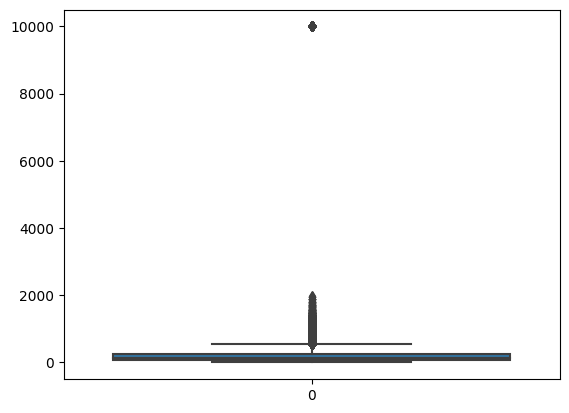

In [ ]:
sns.boxplot(train['Amount_invested_monthly'])

<Axes: >

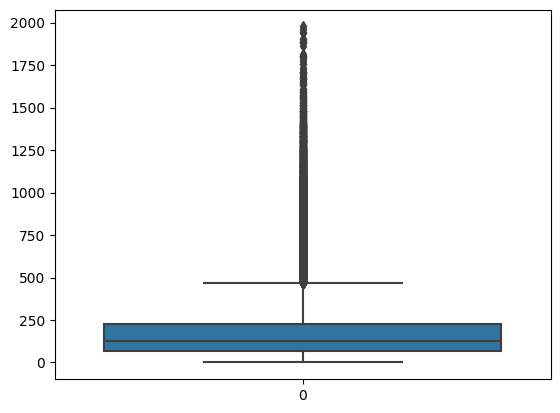

In [ ]:
train.loc[train['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None
sns.boxplot(train['Amount_invested_monthly'])

In [ ]:
train['Amount_invested_monthly']

0         80.415295
1        118.280222
2         81.699521
3        199.458074
4         41.420153
            ...    
99995     60.971333
99996     54.185950
99997     24.028477
99998    251.672582
99999    167.163865
Name: Amount_invested_monthly, Length: 100000, dtype: float64

In [ ]:
#Inputar com a moda
mode_by_group=train.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else x.median() )
train['Amount_invested_monthly']=train['Amount_invested_monthly'].fillna(mode_by_group)


In [ ]:
train[['Amount_invested_monthly']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Amount_invested_monthly  100000 non-null  float64
dtypes: float64(1)
memory usage: 781.4 KB


 #### Monthly_Balance          

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Monthly_Balance')



Before Assigning: Monthly_Balance: have 1200 NaN Values

Existing Min, Max Values:
min   -3.333333e+26
max    1.602041e+03
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	-3.333333333333333e+26
max:	1183.9306960885192

Before Assigning Example Monthly_Balance:

[252.9247932365056, 311.542509588218, 368.61855747932816, 419.7651674292397, 305.8403087451377, 372.87267565273436, 251.0779157891069, 400.36080052211616]
[335.4615535058126, 424.20780255083616, 403.8894479306493, 405.22209014568483, 495.74392668557994, 445.87659854880053, 411.5314794326347, 508.01234122645366]
[837.7364042297336, 563.3542020601286, 962.5677054168697, 969.7201635239168, 486.8950545079987, 810.9750448578231, 1020.6906522485216, 597.8989834797281]
[562.8849248537696, 527.5992232290059, 576.2261427244848, 176.4029215161516, 126.45522835999878, 233.2544839489769, 164.21830873905088, 294.1014665671429]
[559.5288280749833, 501.4739180458856, 524.795288453108, 313.281853929

 #### Total_EMI_per_month

 Tem Outliers

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Total_EMI_per_month')



Existing Min, Max Values:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0
max:	1779.1032538262775

Before Assigning Example Total_EMI_per_month:

[42.941090422469365, 42.941090422469365, 42.941090422469365, 42.941090422469365, 42.941090422469365, 42.941090422469365, 42.941090422469365, 42.941090422469365]
[108.36646712525564, 108.36646712525564, 108.36646712525564, 108.36646712525564, 108.36646712525564, 108.36646712525564, 108.36646712525564, 108.36646712525564]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[123.43493879634316, 123.43493879634316, 123.43493879634316, 123.43493879634316, 123.43493879634316, 123.43493879634316, 123.43493879634316, 123.43493879634316]
[228.018083652734, 228.018083652734, 228.018083652734, 228.018083652734, 228.018083652734, 228.018083652734, 48538.0, 228.018083652734]

After Assigning Example Total_EMI_per_month:

[42.941090422469365, 42.941090422469365, 42.941090422469365, 42

#### Num_of_Loan

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Num_of_Loan')




Existing Min, Max Values:
min    -100
max    1496
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	0
max:	9

Before Assigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2]
[4, 4, 4, 1094, 4, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3]

After Assigning Example Num_of_Loan:

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


#### Interest_Rate outliers

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Interest_Rate')



Existing Min, Max Values:
min       1
max    5797
Name: Interest_Rate, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	1
max:	34

Before Assigning Example Interest_Rate:

[27, 27, 27, 27, 27, 27, 27, 27]
[17, 17, 17, 17, 17, 17, 17, 17]
[1, 1, 1, 1, 1, 1, 1, 1]
[17, 17, 17, 17, 17, 17, 17, 17]
[6, 6, 6, 6, 6, 6, 6, 6]

After Assigning Example Interest_Rate:

[27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]


#### Num_Bank_Accounts

In [ ]:
Input_Numeric_Wrong_Values(train, 'Customer_ID', 'Num_Bank_Accounts')



Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	-1
max:	10

Before Assigning Example Num_Bank_Accounts:

[6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6]
[1, 1, 1, 1, 1, 1, 1, 1]
[3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3]

After Assigning Example Num_Bank_Accounts:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]


In [ ]:
train.loc[train['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = None
mode_by_group=train.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.mode()[0] if not x.mode().empty else x.median )
train['Num_Bank_Accounts']=train['Num_Bank_Accounts'].fillna(mode_by_group)


(array([ 4416.,  4541.,  4340., 12105., 12344., 12299., 13179., 12992.,
        12944., 10840.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

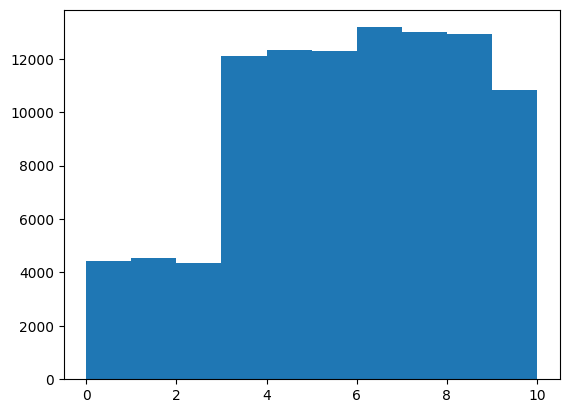

In [ ]:
plt.hist(train['Num_Bank_Accounts'])

In [ ]:
train_input=train.copy()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  int64  
 3   Age                       100000 non-null  float64
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  float64
 9   Num_Credit_Card           100000 non-null  float64
 10  Interest_Rate             100000 non-null  float64
 11  Num_of_Loan               100000 non-null  float64
 12  Type_of_Loan              100000 non-null  object 
 13  Delay_from_due_date       100000 non-null  in

### Avaliação

In [ ]:
train.drop(columns=['ID','Customer_ID','SSN','Type_of_Loan'],inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  ob

#### Dummetização

In [ ]:
# df.select_dtypes(include=['object']).columns.tolist()
cat_feat=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Payment_of_Min_Amount']

In [ ]:
dummies=pd.get_dummies(train[cat_feat], prefix=cat_feat,drop_first=True)
dummies

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
99996,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
99997,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
99998,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
train=pd.concat([train,dummies],axis=1)
train.drop(columns=cat_feat,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 44 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 100000 non-null  float64
 2   Annual_Income                                       100000 non-null  float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         100000 non-null  float64
 8   Delay_from_due_date                                 100000 non-nu

#### Avaliação

In [ ]:
DT2 = DecisionTreeClassifier(criterion="entropy", max_depth=5)


X=train.drop(["Credit_Score"],axis=1)

y = train[['Credit_Score']].copy()

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)


DT.fit(X_train,y_train)

y_pred=DT.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.58      0.69      0.63      5322
        Poor       0.69      0.67      0.68      8805
    Standard       0.75      0.72      0.74     15873

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70      0.70     30000



In [ ]:
recall=recall.append(get_score(y_pred,y_test,'2 - Inputação'))
recall

<ipython-input-152-fb3cea152909>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recall=recall.append(get_score(y_pred,y_test,'2 - Inputação'))


,Recall: Good,Recall: Standard,Recall: Poor,Acurácia
0 - Avaliação Inicial,0.18,0.71,0.77,0.64
2 - Inputação,0.69,0.72,0.67,0.70


## Scaling


### Standard

In [ ]:
scaler.transform?

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Convert the scaled data back to a DataFrame (optional)
X_test_scaled=scaler.transform(X_test)



### Avaliação

In [ ]:
DT2 = DecisionTreeClassifier(criterion="entropy", max_depth=5)




DT.fit(X_train_scaled,y_train)

y_pred=DT.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.58      0.69      0.63      5322
        Poor       0.69      0.67      0.68      8805
    Standard       0.75      0.72      0.74     15873

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70      0.70     30000



In [ ]:
recall=recall.append(get_score(y_pred,y_test,'3.1 - Standard Scaling'))
recall

<ipython-input-156-bf857f96cd75>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recall=recall.append(get_score(y_pred,y_test,'3.1 - Standard Scaling'))


,Recall: Good,Recall: Standard,Recall: Poor,Acurácia
0 - Avaliação Inicial,0.18,0.71,0.77,0.64
2 - Inputação,0.69,0.72,0.67,0.70
3.1 - Standard Scaling,0.69,0.72,0.67,0.70


### Robust

In [ ]:
from sklearn.preprocessing import RobustScaler

# Initialize the StandardScaler
scaler = RobustScaler()

# Fit the scaler to the data and transform the data
X_train_Robust_Scaled = scaler.fit_transform(X_train)

# Convert the scaled data back to a DataFrame (optional)
X_test_Robust_Scaled=scaler.transform(X_test)



### Avaliação

In [ ]:
DT2 = DecisionTreeClassifier(criterion="entropy", max_depth=5)


DT.fit(X_train_Robust_Scaled,y_train)

y_pred=DT.predict(X_test_Robust_Scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.58      0.69      0.63      5322
        Poor       0.69      0.67      0.68      8805
    Standard       0.75      0.72      0.74     15873

    accuracy                           0.70     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.71      0.70      0.70     30000



In [ ]:
recall=recall.append(get_score(y_pred,y_test,'3.2 - Robust Scaling'))
recall

<ipython-input-159-716879da8981>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recall=recall.append(get_score(y_pred,y_test,'3.2 - Robust Scaling'))


,Recall: Good,Recall: Standard,Recall: Poor,Acurácia
0 - Avaliação Inicial,0.18,0.71,0.77,0.64
2 - Inputação,0.69,0.72,0.67,0.70
3.1 - Standard Scaling,0.69,0.72,0.67,0.70
3.2 - Robust Scaling,0.69,0.72,0.67,0.70


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

mapping = {'Good' : 0, 'Standard' : 1, 'Poor' : 2}

y_train_encoded=np.array([mapping.get(val) for val in y_train["Credit_Score"]]).astype(int)
y_test_encoded=np.array([mapping.get(val) for val in y_test["Credit_Score"]]).astype(int)


model = RandomForestClassifier()
model.fit(X_train_scaled,y_train_encoded)

y_pred = model.predict(X_test_scaled)


              precision    recall  f1-score   support

           0       0.78      0.79      0.78      5322
           1       0.84      0.82      0.83     15873
           2       0.81      0.83      0.82      8805

    accuracy                           0.82     30000
   macro avg       0.81      0.82      0.81     30000
weighted avg       0.82      0.82      0.82     30000



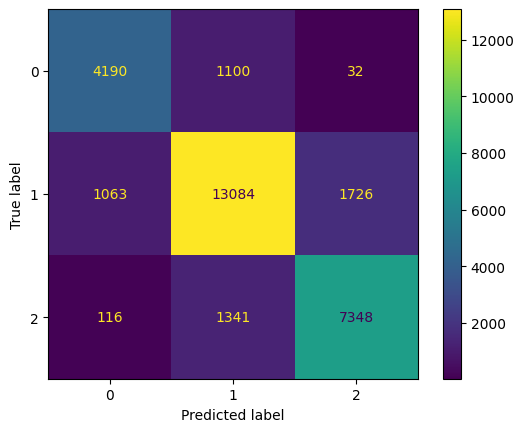

<ipython-input-161-4a3abd04c637>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recall=recall.append(get_score(y_pred,y_test_encoded,'4 - random forest'))


,Recall: Good,Recall: Standard,Recall: Poor,Acurácia
0 - Avaliação Inicial,0.18,0.71,0.77,0.64
2 - Inputação,0.69,0.72,0.67,0.70
3.1 - Standard Scaling,0.69,0.72,0.67,0.70
3.2 - Robust Scaling,0.69,0.72,0.67,0.70
4 - random forest,0.79,0.82,0.83,0.82


In [ ]:
print(classification_report(y_test_encoded,y_pred))

ConfusionMatrixDisplay.from_predictions(y_test_encoded,y_pred)
plt.show();

recall=recall.append(get_score(y_pred,y_test_encoded,'4 - random forest'))
recall
# joblib.dump(model, 'modelo_credit_score')

# Algoritmo Não Supervisionado

Vamos Avaliar a classificação por um método k_means com as features reduzidas através do método PCA

In [ ]:
## Reduzindo Variaveis
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Invocar o método PCA. Como este é um problema de classificação binária
# vamos chamar n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_train_scaled)

pca_2d_test=pca.transform(X_test_scaled)



### Visualizando distribuição de dados com labels reais


Text(0.5, 1.0, 'PCA_PLOT')

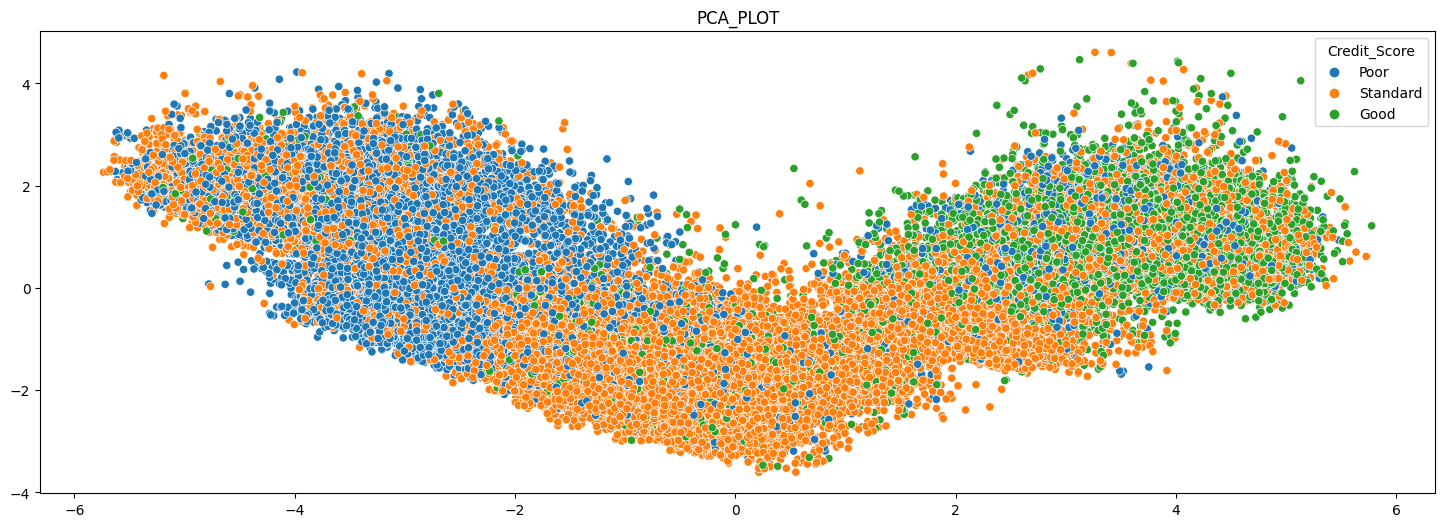

In [ ]:
#Configurando matplotlib
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,6), dpi=100)
#Plotando PCA
sns.scatterplot(x=pca_2d[:,0],y=pca_2d[:,1], ax=axes, hue=y_train['Credit_Score'])
# TItulo PCA
axes.set_title('PCA_PLOT')


Com essa redução de dimensionalidade dificelmente um classificador conseguirá classificar de maneira adequada. Principalmente as classes Poor e Good

## Classificação com KMeans

In [ ]:
from sklearn.cluster import KMeans

baseDados=pd.DataFrame(data=np.column_stack((pca_2d,y_train_encoded)), columns=['X1', 'X2', 'Y'])

# Number of clusters (you may adjust this)
n_clusters = 3

# Applying k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
baseDados['Cluster'] = kmeans.fit_predict(baseDados)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


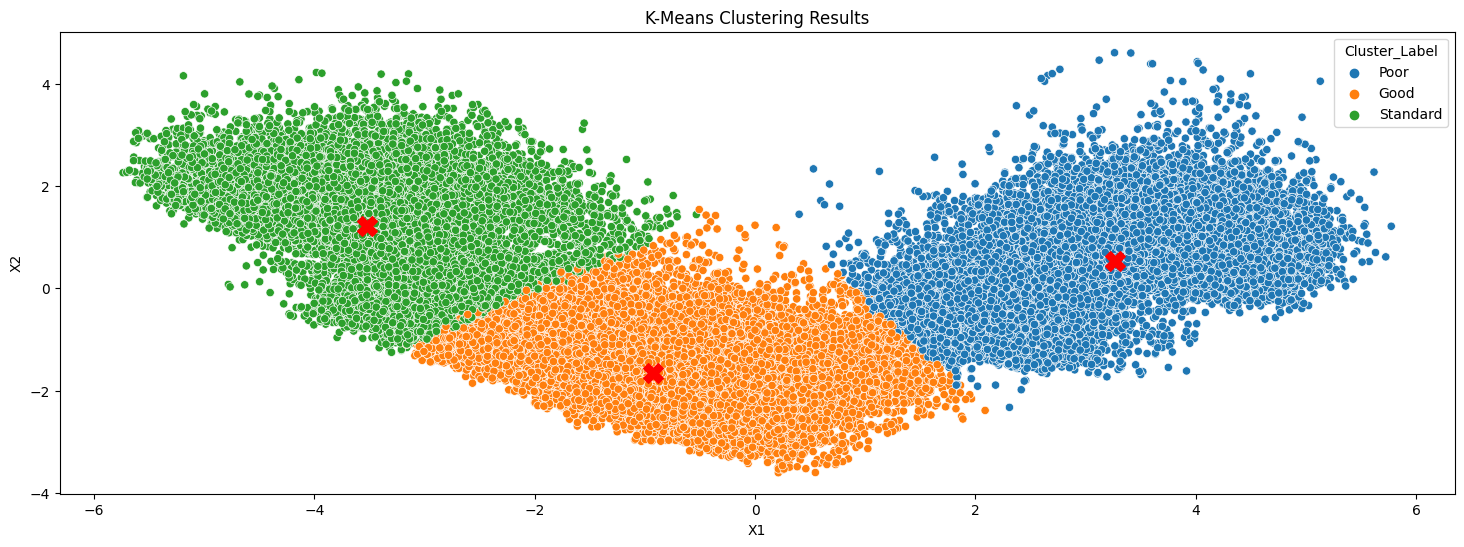

In [ ]:
cluster_mapping= {0:'Poor', 1:"Standard",2:'Good'}
baseDados['Cluster_Label'] = baseDados['Cluster'].map(cluster_mapping)

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(18,6), dpi=100)
sns.scatterplot(x= baseDados['X1'],y= baseDados['X2'], ax=axes, hue= baseDados['Cluster_Label'])  #### criar cluster label erro
plt.title('K-Means Clustering Results')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')





In [ ]:
from sklearn import metrics
labels_true=y_train['Credit_Score']
labels=baseDados['Cluster_Label']
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pca_2d, labels))


Homogeneity: 0.185
Completeness: 0.170
V-measure: 0.177
Adjusted Rand Index: 0.136
Adjusted Mutual Information: 0.177
Silhouette Coefficient: 0.609


Como esperado o classificador não teve um bom desempenho em classificar de maneira similar ao crédito Score